## 3.15 Homework

### Dataset

In this homework, we will continue the New York City Airbnb Open Data. You can take it from
[Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

We'll keep working with the `'price'` variable, and we'll transform it to a classification task.


### Features

For the rest of the homework, you'll need to use the features from the previous homework with additional two `'neighbourhood_group'` and `'room_type'`. So the whole feature set will be set as follows:

* `'neighbourhood_group'`,
* `'room_type'`,
* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

Select only them.



In [112]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv")
features = [ 'neighbourhood_group','room_type', 'latitude','longitude', 'price', 'minimum_nights',
            'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df = df[features]

In [113]:
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0



### Question 1

What is the most frequent observation (mode) for the column `'neighbourhood_group'`?




In [114]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [115]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [116]:
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,brooklyn,private_room,40.64749,-73.97237,149,1,9,0.21,6,365
1,manhattan,entire_home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,manhattan,private_room,40.80902,-73.94190,150,3,0,NaN,1,365
3,brooklyn,entire_home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,manhattan,entire_home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


In [118]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [119]:
mean_rev = df.reviews_per_month.mean()               

In [120]:
mean_rev

1.3732214298586884

In [121]:
# Make new variable for binary target
# Fill missing values with mean

import numpy as np

df['above_average'] = np.where(df.price.values >= 152, 1, 0)

df['reviews_per_month'] = df['reviews_per_month'].fillna(mean_rev)

In [122]:
df.columns

Index(['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'above_average'],
      dtype='object')

In [164]:
categorical = ['neighbourhood_group', 'room_type']
numerical = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_average                   48895 non-null  int32  
dtypes: float64(3), int32(1), int64(5), object(2)
memory usage: 3.9+ MB


### Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value ('price') is not in your dataframe.


### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
   * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Example of a correlation matrix for the car price dataset:

<img src="images/correlation-matrix.png" />




In [126]:
df.columns

Index(['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'above_average'],
      dtype='object')

In [127]:
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,brooklyn,private_room,40.64749,-73.97237,149,1,9,0.210000,6,365,0
1,manhattan,entire_home/apt,40.75362,-73.98377,225,1,45,0.380000,2,355,1
2,manhattan,private_room,40.80902,-73.94190,150,3,0,1.373221,1,365,0
3,brooklyn,entire_home/apt,40.68514,-73.95976,89,1,270,4.640000,1,194,0
4,manhattan,entire_home/apt,40.79851,-73.94399,80,10,9,0.100000,1,0,0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_average                   48895 non-null  int32  
dtypes: float64(3), int32(1), int64(5), object(2)
memory usage: 3.9+ MB


In [129]:
from sklearn.model_selection import train_test_split

In [130]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [131]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [132]:
#Opcional

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [133]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

df_train = df_train.drop(['price', 'above_average'], axis=1)
df_val = df_val.drop(['price', 'above_average'], axis=1)
df_test = df_test.drop(['price', 'above_average'], axis=1)

In [134]:
df_full_train.above_average.value_counts(normalize=True)

0    0.693987
1    0.306013
Name: above_average, dtype: float64

In [135]:
df_train.head()

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,brooklyn,entire_home/apt,40.72760,-73.94495,3,29,0.700000,13,50
1,manhattan,private_room,40.70847,-74.00498,1,0,1.373221,1,7
2,bronx,entire_home/apt,40.83149,-73.92766,40,0,1.373221,1,0
3,brooklyn,entire_home/apt,40.66448,-73.99407,2,3,0.080000,1,0
4,manhattan,private_room,40.74118,-74.00012,1,48,1.800000,2,67


In [136]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

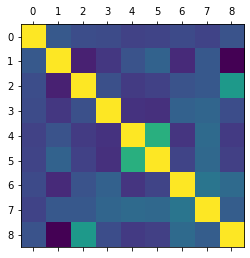

In [137]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

In [138]:
corr_matrix = df.corr()

In [139]:
corr_matrix

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.009115,0.019517,-0.010983,0.056385
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.131599,-0.114713,0.082731,-0.267001
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.022373,0.057472,0.081829,0.418150
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.091942,0.127960,0.144303,0.034715
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.530093,-0.072376,0.172028,-0.051785
reviews_per_month,-0.009115,0.131599,-0.022373,-0.091942,0.530093,1.000000,-0.006701,0.162980,-0.029367
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.006701,1.000000,0.225701,0.170075
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.162980,0.225701,1.000000,0.104255
above_average,0.056385,-0.267001,0.418150,0.034715,-0.051785,-0.029367,0.170075,0.104255,1.000000


In [140]:
corr_matrix['price'].abs().sort_values(ascending = False)

price                             1.000000
above_average                     0.418150
longitude                         0.150019
availability_365                  0.081829
calculated_host_listings_count    0.057472
number_of_reviews                 0.047954
minimum_nights                    0.042799
latitude                          0.033939
reviews_per_month                 0.022373
Name: price, dtype: float64

### Question 3

* Calculate the mutual information score for the two categorical variables that we have. Use the training set only.
* Which of these two variables has bigger score?
* Round it to 2 decimal digits using `round(score, 2)`




In [141]:
from sklearn.metrics import mutual_info_score

In [142]:
mutual_info_score(df_full_train.price, df_full_train.neighbourhood_group)

0.1056445793690175

In [143]:
mutual_info_score(df_full_train.price, df_full_train.room_type)

0.3114071511354918

In [144]:
def mutual_info_price_score(series):
    return mutual_info_score(series, df_full_train.price).round(2)

In [145]:
mi = df_full_train[categorical].apply(mutual_info_price_score)
mi.sort_values(ascending=False)

room_type              0.31
neighbourhood_group    0.11
dtype: float64

### Question 4

* Now let's train a logistic regression
* For that, we need to turn our price prediction problem into a binary classification task.
* Let's create a variable `above_average` which is `1` if the price is above (or equal to) `152`.
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset.
   * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
   * `model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)`
* Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.




In [146]:
from sklearn.feature_extraction import DictVectorizer

In [150]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.fit_transform(test_dict)

In [151]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=bronx',
 'neighbourhood_group=brooklyn',
 'neighbourhood_group=manhattan',
 'neighbourhood_group=queens',
 'neighbourhood_group=staten_island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=entire_home/apt',
 'room_type=private_room',
 'room_type=shared_room']

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
model =  LogisticRegression(C=1.0, random_state=42)

model.fit(X_train, y_train)

C:\Users\uic31271\Anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [154]:
model.intercept_[0]

-0.002613291135360421

In [155]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'availability_365': 0.003,
 'calculated_host_listings_count': 0.004,
 'latitude': -0.221,
 'longitude': -0.09,
 'minimum_nights': -0.011,
 'neighbourhood_group=bronx': -0.389,
 'neighbourhood_group=brooklyn': 0.117,
 'neighbourhood_group=manhattan': 1.216,
 'neighbourhood_group=queens': -0.82,
 'neighbourhood_group=staten_island': -0.128,
 'number_of_reviews': -0.004,
 'reviews_per_month': 0.02,
 'room_type=entire_home/apt': 1.642,
 'room_type=private_room': -1.191,
 'room_type=shared_room': -0.454}

In [156]:
model.score(X_test, y_test).round(2)

0.79

In [159]:
model.score(X_val, y_val).round(2)

0.78

### Question 5

* We have 10 features: 8 numerical features and 2 categorical.
* Let's find the least useful one using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `neighbourhood_group`
   * `room_type` 
   * `number_of_reviews`
   * `reviews_per_month`

> **note**: the difference doesn't have to be positive




In [215]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [216]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

df_train = df_train.drop(['price', 'above_average', 'number_of_reviews'], axis=1)
df_val = df_val.drop(['price', 'above_average', 'number_of_reviews'], axis=1)
df_test = df_test.drop(['price', 'above_average', 'number_of_reviews'], axis=1)

In [217]:
df.columns

Index(['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'above_average'],
      dtype='object')

In [218]:
#categorical = ['neighbourhood_group', 'room_type']
#numerical = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [219]:
categorical = ['neighbourhood_group', 'room_type']
numerical = ['latitude', 'longitude', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [220]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.fit_transform(test_dict)

In [221]:
model =  LogisticRegression(C=1.0, random_state=42)

model.fit(X_train, y_train)

C:\Users\uic31271\Anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [222]:
model.score(X_test, y_test)

0.7924123120973514

In [223]:
model.score(X_val, y_val)

0.7865834952449126

In [214]:
test_score_neighbourhood_group = 0.7516105941302792
test_score_room_type = 0.7245117087636773
test_score_number_of_reviews = 0.7924123120973514
test_score_reviews_per_month = 0.7924123120973514

val_score_neighbourhood_group = 0.7499744350138051
val_score_room_type = 0.7138766745065958
val_score_number_of_reviews = 0.7865834952449126
val_score_reviews_per_month = 0.7851518560179978

test_score_room_type has 7% less accuracy
Removing number_of_reviews and reviews_per_month gives the same result


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'price'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.



In [293]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv")
df['reviews_per_month'] = df['reviews_per_month'].fillna(mean_rev)

In [294]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [295]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [296]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

y_train_trans = np.log1p(y_train)
y_val_trans = np.log1p(y_val)
y_test_trans = np.log1p(y_test)


df_train = df_train.drop(['price'], axis=1)
df_val = df_val.drop(['price'], axis=1)
df_test = df_test.drop(['price'], axis=1)

In [297]:
categorical = ['neighbourhood_group', 'room_type']
numerical = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [298]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.fit_transform(test_dict)

In [325]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 10)

In [326]:
model.fit(X_train, y_train_trans)


Ridge(alpha=10)

In [327]:
model.score(X_test, y_test_trans)

0.4986453520884089

In [328]:
model.score(X_val, y_val_trans)

0.48706844705193497

In [329]:
from sklearn.metrics import mean_squared_error
import math

In [330]:
y_pred = model.predict(X_val)

In [334]:
MSE = mean_squared_error(y_val_trans, y_pred)
RMSE = math.sqrt(MSE)
RMSE

0.49753312346525835

In [335]:
alpha = [0, 0.01, 0.1, 1, 10]

RMSE_0 = 0.49673484049876904
RMSE_0.01 = 0.4967349434714618
RMSE_0.1 = 0.4967359961647581
RMSE_1 = 0.4967579866693693
RMSE_10 = 0.49753312346525835

alpha 0 is best


## Submit the results

Submit your results here: 

If your answer doesn't match options exactly, select the closest one.

## Deadline


The deadline for submitting is 27 September 2021, 17:00 CET. After that, the form will be closed.



## Nagivation

* [Machine Learning Zoomcamp course](../)
* [Session 3: Machine Learning for Classification](./)
* Previous: [Explore more](14-explore-more.md)
